In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [5]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3


In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No any Null value is present.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [9]:
df=df.drop(["veil-type"],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


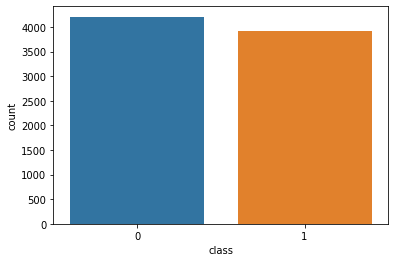

In [10]:
sns.countplot(df['class'])

The dataset is balanced

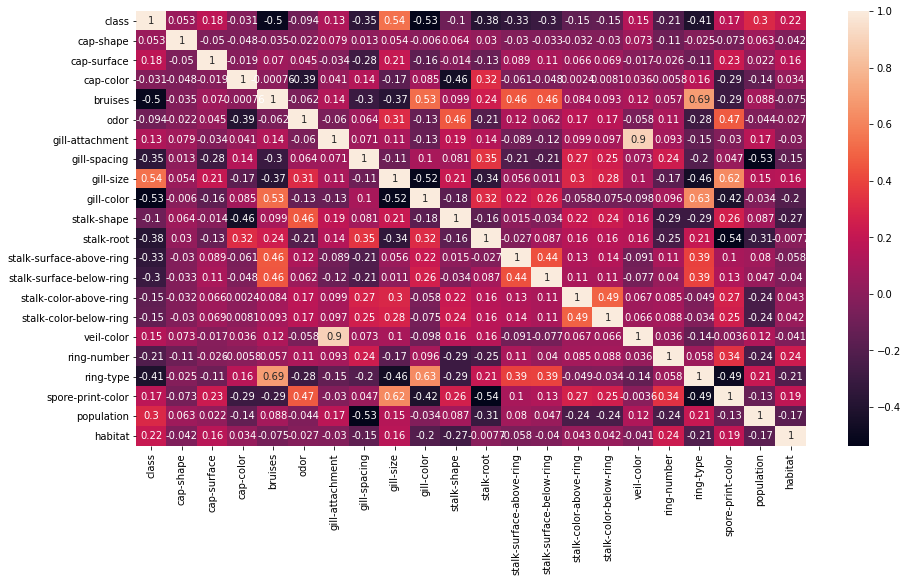

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

Usually the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely:

In [12]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


Lets look closely at the feature "gill-color" :

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


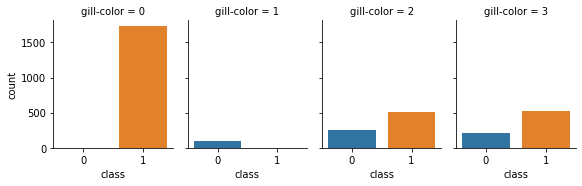

In [13]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


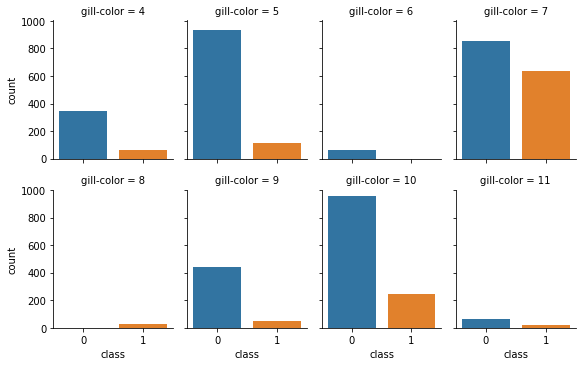

In [14]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

In [15]:
df_x=df.drop(['class'], axis=1)
y=df['class']

In [16]:

#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [17]:
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [18]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x,y)

random state : 42  and f1 score:  0.9610223642172523
random state : 43  and f1 score:  0.949238578680203
random state : 44  and f1 score:  0.9543408360128617
random state : 45  and f1 score:  0.9504823151125401
random state : 46  and f1 score:  0.9534141671984684
random state : 47  and f1 score:  0.9616858237547893
random state : 48  and f1 score:  0.9601542416452441
random state : 49  and f1 score:  0.9498714652956298
random state : 50  and f1 score:  0.9598470363288718
random state : 51  and f1 score:  0.9567979669631512
random state : 52  and f1 score:  0.942912123155869
random state : 53  and f1 score:  0.9509241555130656
random state : 54  and f1 score:  0.9557975656630366
random state : 55  and f1 score:  0.9573643410852712
random state : 56  and f1 score:  0.9574062301335029
random state : 57  and f1 score:  0.9497422680412372
random state : 58  and f1 score:  0.9626769626769627
random state : 59  and f1 score:  0.960559796437659
random state : 60  and f1 score:  0.9495472186287

In [19]:

#Lets use cross_val_score and evaluate the logistic regression model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.8328605473002251
standard deviation in f1 score for logistic classifier:  0.1472458918177036
[0.6260745  0.98146965 0.85190616 0.99808551 0.70676692]


In [20]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 2}

In [21]:
kc=KNeighborsClassifier(n_neighbors=2)
maxf1_score(kc,x,y)

random state : 42  and f1 score:  1.0
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  1.0
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  0.9987212276214833
random state : 54  and f1 score:  1.0
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
random state : 67  and f1 score:  1

In [22]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(kc,x,y,cv=5,scoring="f1"))

Mean f1 score for knn classifier:  0.909718652692284
standard deviation in f1 score for knn classifier:  0.0921937110685453
[0.80487805 1.         0.95040214 1.         0.79331307]


In [23]:

#lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,x,y)

random state : 42  and f1 score:  1.0
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  1.0
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  1.0
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
random state : 67  and f1 score:  1.0
random state

In [24]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(dc,x,y,cv=5,scoring="f1"))

Mean f1 score for decision tree classifier:  0.9264770017966028
standard deviation in f1 score for decision tree classifier:  0.08702432256225057
[0.86046512 1.         0.99743918 1.         0.95604396]


In [25]:
#lets use ensemble calssifier such as random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 10}

In [26]:
rf_clf=RandomForestClassifier(n_estimators=10)
maxf1_score(rf_clf,x,y)

random state : 42  and f1 score:  1.0
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  1.0
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  1.0
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
random state : 67  and f1 score:  1.0
random state

In [27]:
#lets again use cross val score
print("Mean f1 score for random forest classifier: ",cross_val_score(rf_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(rf_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(rf_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for random forest classifier:  0.9282800277613106
standard deviation in f1 score for random forest classifier:  0.12602344948468297
[0.80487805 1.         0.99357326 1.         0.76840039]


In [28]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'poly'}

In [29]:
svc=SVC(kernel="poly",C=10)
maxf1_score(svc,x,y)

random state : 42  and f1 score:  1.0
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  1.0
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  1.0
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
random state : 67  and f1 score:  1.0
random state

In [30]:
#lets again use cross val score
print("Mean f1 score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(svc,x,y,cv=5,scoring="f1"))

Mean f1 score for SVM classifier:  0.9072966678159167
standard deviation in f1 score for SVM classifier:  0.1126424560656545
[0.80487805 1.         0.99292605 1.         0.73867925]


In [31]:
#comparitively SVM is performing better so lets use svm
#random state 45
svc=SVC(kernel="poly",C=0.1)
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 45,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [32]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[842   0]
 [ 13 770]]
f1 score is :  0.9916291049581455
classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       842
           1       1.00      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC ROC Score:  0.9916985951468711


In [33]:
import pickle
import joblib

In [34]:
joblib.dump(svc, 'concrete.0bj')
pickle.dump(svc,open('svc.pkl','wb'))